In [109]:
import numpy as np
import matplotlib.pyplot as plt

In [110]:
def placeCitiesRandomly(n , xmax , ymax):
    x = np.random.randint(xmax, size=n)
    y = np.random.randint(ymax, size=n)
    map_ = np.zeros((n,2))
    map_[:,0]= x
    map_[:,1]=y
    return(map_)
    

In [111]:
map_ = placeCitiesRandomly(10,10,10)

In [112]:
print(map_)

[[4. 1.]
 [9. 7.]
 [7. 7.]
 [1. 7.]
 [1. 4.]
 [9. 3.]
 [9. 9.]
 [2. 4.]
 [5. 6.]
 [8. 0.]]


In [113]:
def distance_matrix(map_):
    dist_mat = np.zeros((map_.shape[0], map_.shape[0]))
    for i in range(map_.shape[0]):
        for j in range(map_.shape[0]):
            dist = np.linalg.norm(np.array([map_[i][0],map_[i][1]]) - np.array([map_[j][0],map_[j][1]]))
            dist_mat[i][j] = dist
    return(dist_mat)

In [114]:
distances = distance_matrix(map_)

In [115]:
def objective(permutation, distances):
    obj = 0
    for i in range(len(permutation)-1):
        city_pred = permutation[i]-1
        city_curr = permutation[i+1]-1
        obj += distances[city_pred][city_curr]
    return(obj)

In [116]:
objective([1,3,2,4,5], distances)

19.70820393249937

In [123]:
def plotSolution(permutation,map_):
    ordered_list_x = [map_[i][0] for i in permutation]
    ordered_list_y = [map_[i][1] for i in permutation]
    plt.plot(ordered_list_x, ordered_list_y, 'ro-')

In [124]:
map_

array([[4., 1.],
       [9., 7.],
       [7., 7.],
       [1., 7.],
       [1., 4.],
       [9., 3.],
       [9., 9.],
       [2., 4.],
       [5., 6.],
       [8., 0.]])

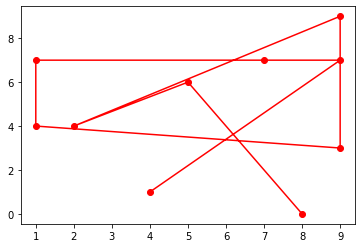

In [125]:
plotSolution([i for i in range(10)], map_)

In [128]:
def initialisation(mu, n):
    perm_list = []
    for i in range(mu):
        perm_list.append(1+np.random.permutation(n))
    return(perm_list)

In [132]:
inits = initialisation(3,10)

In [169]:
inits[0]

array([ 8,  1,  6,  4, 10,  7,  2,  3,  9,  5])

In [500]:
import random

In [589]:
def swap_random_proba(permutation, swap_proba):
    
    if random.random()<swap_proba:
        idx = range(len(permutation))
        i1, i2 = random.sample(idx, 2)
        permutation[i1], permutation[i2] = permutation[i2], permutation[i1]
    return(permutation)

In [590]:
def order_crossover(parent1, parent2) :
    
    
    child1 = [0] * len(parent1)
    child2 = [0] * len(parent1)
    
    idx = range(len(parent1))
    i1, i2 = random.sample(idx, 2)

    
    
    
    if i2<i1:
        i2,i1 = i1,i2
     
    #ordered1 = sort(parent1.copy())
    #ordered2 = parent2.copy().sort()
    
    rest_parent1 = np.concatenate((parent1[i2:],parent1[:i2]) , 0)
    rest_parent2 = np.concatenate((parent2[i2:], parent2[:i2]), 0)
        
    child1[i1:i2] = parent1[i1:i2]
    child2[i1:i2] = parent2[i1:i2]
    
    j=0
    for i in range (i2,len(parent1)):
        while rest_parent2[j] in child1:
            j+=1
        
        child1[i]=rest_parent2[j]    
    
    j=0
    for i in range (i1):
        while rest_parent2[j] in child1:
            j+=1
        
        child1[i]=rest_parent2[j]
        
    j=0
    for i in range (i2,len(parent1)):
        while rest_parent1[j] in child2:
            j+=1
        
        child2[i]=rest_parent1[j]    
    
    j=0
    for i in range (i1):
        while rest_parent1[j] in child2:
            j+=1
        
        child2[i]=rest_parent1[j]
        
    
    
    
    
    return child1, child2

In [591]:
print(inits[0])
print(inits[1])

[ 8  1  6  4 10  7  2  3  9  5]
[ 5 10  6  4  3  1  7  2  9  8]


In [592]:
order_crossover(inits[0] , inits[1])


([8, 10, 6, 4, 3, 1, 7, 2, 9, 5], [5, 1, 6, 4, 10, 7, 2, 3, 9, 8])

In [601]:
mu = 20
n = 7

In [602]:
init_populations = initialisation(mu , n)
childs = []
for i in range(mu):
    parent1, parent2 = random.sample(init_populations, 2)
    child1, child2 = (order_crossover(parent1,parent2))
    child1 = swap_random_proba(child1, .1)
    child2 = swap_random_proba(child2 , .1)
    childs.append(child1)
    childs.append(child2)
    
for child in childs:
    a =objective(child,distances)
    print("Loss for" , child , " =" ,a)

Loss for [1, 3, 6, 4, 7, 2, 5]  = 38.91482679405096
Loss for [2, 6, 4, 3, 7, 5, 1]  = 35.449320853921236
Loss for [2, 3, 6, 1, 4, 5, 7]  = 30.999485826690055
Loss for [3, 6, 4, 1, 2, 5, 7]  = 45.91284635077889
Loss for [3, 1, 6, 7, 5, 2, 4]  = 44.07135361700801
Loss for [1, 3, 7, 5, 6, 2, 4]  = 39.03286993760071
Loss for [5, 3, 7, 6, 2, 1, 4]  = 34.05508466565158
Loss for [3, 1, 5, 2, 7, 4, 6]  = 38.685331526170664
Loss for [6, 5, 3, 1, 4, 7, 2]  = 38.43308079703198
Loss for [6, 1, 3, 5, 4, 7, 2]  = 32.04778392336856
Loss for [7, 3, 1, 4, 2, 6, 5]  = 36.30709273804348
Loss for [3, 6, 5, 1, 2, 4, 7]  = 40.83349531755939
Loss for [5, 6, 3, 4, 7, 2, 1]  = 36.590854630440106
Loss for [1, 4, 3, 7, 2, 6, 5]  = 29.598888805544107
Loss for [3, 7, 1, 5, 2, 4, 6]  = 41.99332459923877
Loss for [7, 4, 6, 5, 2, 3, 1]  = 42.50494858734993
Loss for [4, 7, 6, 3, 1, 2, 5]  = 41.78080455995846
Loss for [7, 4, 1, 6, 3, 2, 5]  = 35.3557196911863
Loss for [7, 2, 6, 1, 4, 5, 3]  = 27.801572672133243
Loss fo